In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


In [3]:
from lib import processing

data = processing.process_data(df)

Using a total of 14640 tweets


In [11]:
from lib import classify
from nltk.sentiment import SentimentAnalyzer

sentim_analyzer = SentimentAnalyzer()
classify.add_features(data, sentim_analyzer, min_freq = 20)

Unigram features 1332
Bigram features:  1385


## Naive Bayes

In [12]:
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB

evaluations = []
alpha_range = [0, 0.25, 0.5, 0.75, 1]
for alpha in alpha_range: 
    trainer = {
        'name': 'Naive Bayes Classifier',
        'train': SklearnClassifier(BernoulliNB(
            fit_prior = True,  # learn class probabilities
            alpha = alpha,     # smooth to avoid 0 probability issue on non existent featurest
            )).train,
    }
    print("-------------------------------")
    print("Training with alpha = ", alpha)
    e = classify.train_model(data, sentim_analyzer, trainer, sample_size = 3000)
    evaluations.append(e)



-------------------------------
Training with alpha =  0
Training: Naive Bayes Classifier
Sampled 3000 elements
	Training fold 1
Training classifier
	Evaluating fold 1
Evaluating SklearnClassifier results...
	Training fold 2
Training classifier
	Evaluating fold 2
Evaluating SklearnClassifier results...
	Training fold 3
Training classifier
	Evaluating fold 3
Evaluating SklearnClassifier results...
	Training fold 4
Training classifier
	Evaluating fold 4
Evaluating SklearnClassifier results...
	Training fold 5
Training classifier
	Evaluating fold 5
Evaluating SklearnClassifier results...
	Training fold 6
Training classifier
	Evaluating fold 6
Evaluating SklearnClassifier results...
	Training fold 7
Training classifier
	Evaluating fold 7
Evaluating SklearnClassifier results...
	Training fold 8
Training classifier
	Evaluating fold 8
Evaluating SklearnClassifier results...
	Training fold 9
Training classifier
	Evaluating fold 9
Evaluating SklearnClassifier results...
	Training fold 10
Traini

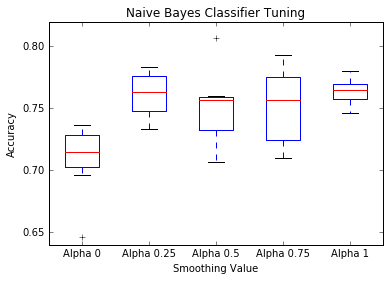

In [18]:
eval_data = [[evaluations[j][i]['Accuracy'] for j in range(len(alpha_range))] for i in range(10)]
eval_df = pandas.DataFrame(eval_data, columns = ["Alpha " + str(x) for x in alpha_range])
eval_df.plot.box()
plt.xlabel("Smoothing Value")
plt.ylabel("Accuracy")
plt.title("Naive Bayes Classifier Tuning")

In [15]:
from IPython.display import display, HTML

summary_accuracy =  eval_df.mean(axis = 0).round(4) * 100
final_df = pandas.DataFrame(list(zip(alpha_range, summary_accuracy)), columns=["Alpha", "Accuracy"])
HTML(final_df.to_html())

,Alpha,Accuracy
0,0.00,71.07
1,0.25,76.10
2,0.50,74.80
3,0.75,75.13
4,1.00,76.37


### Dupa cum se poate observa, valoarea optima a parametrului alpha este 1

# Concluzie

Pentru un clasificator de tipul Naive Bayes, acesta are o performanța buna cu un factor de smoothing egal cu 1, acela care este standard.
